(C) Copyright 2024 IBM

Any modifications or derivative works of this code must retain this
copyright notice, and modified files need to carry a notice indicating
that they have been altered from the originals.

This code is associated to the paper "Diagonalization of large many-body Hamiltonians on a quantum processor" [https://arxiv.org/abs/2407.14431](https://arxiv.org/abs/2407.14431).

In [1]:
import numpy as np
import itertools as it
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



from qiskit.quantum_info import SparsePauliOp

import sys
sys.path.append('..')

from utils import optimize_threshold

In [2]:
noise_scales = [1, 1.3, 1.6]

dt = 0.1

H = SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIII', 'IIIXIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXIIIXIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIIIII', 'XIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXIIIIIIXIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIXIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIXII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIXIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIXIIIIIIIXIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIXIIIIXIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIII', 'IIIIIIIIXIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIXIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIXIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIXIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIII', 'IIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIXIIIIIXIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIII', 'IIXIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIXIIIIIIIIXIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIXXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIYIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIYIIIIIIII', 'IIIIIIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIII', 'IIIYIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIYIIIYIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIIIII', 'YIIIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIYIIIIIIYIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIYIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIYIIIIIIIIIYIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIYII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIYIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIYIIIIIIIYIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIYIIIIYIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIYIIYIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIII', 'IIIIIIIIYIIIIIIIIYIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIYYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIYIIIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IYYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIYIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIYIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIII', 'IIIIIYIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIYYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIYIIIIIYIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIII', 'IIYIIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'YYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIYIIIIIIIIYIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIYYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIIZIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIIIZIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIIZIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIII', 'IIIIIZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIIIZIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIIIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j])

S_meas = SparsePauliOp(['IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII'],
              coeffs=[1.+0.j, 0.+1.j])

H_meas = SparsePauliOp(['IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXXIX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIIIXI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIXXIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIXIIXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXXXIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIXIXIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIIXIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXIIIIXXXIIIIXIII', 'IIIIXIIIIIIXIIIIIXIXIIIXIIIIIIIIXXIIIIIXIII', 'IIIXXIIXIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXIIIXXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIXIXIIIIIIIXIIIIIIIIXXIIIIIXIII', 'XIIIXIXIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIXIIIIIIXIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIXIIIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIXXIIIIIIIIXIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIXIIIXXII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIXXXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXXIXIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIXXIIIIIIXIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIXXIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIXIXIIXIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIXIIIIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXXXIIIIIIXXIIIIIXIII', 'IIIIXIIIXIIXIIIIIXIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIIXIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIXXIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIXIIIXIXIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IXXIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIIXIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIXIIXIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIXIIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIXX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIXIIXXIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXIXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIXIIIIIIXXXIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXXIIIXXIIIIIXIII', 'IIIIXXIIXIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIXIIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIXIIIIIXXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXXIIIXIIIIIIIIXXIIIIIXIII', 'IIXIXIIXIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'XXIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXXIIIIIIIIXIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIXXIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIXIIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXXIX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIIIXI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIXXIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIXIIYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXXYIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIXIXIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIIXIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXIIIIXYXIIIIXIII', 'IIIIXIIIIIIXIIIIIXIXIIIXIIIIIIIIXYIIIIIXIII', 'IIIXXIIXIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXIIIXXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIXIXIIIIIIIXIIIIIIIIXYIIIIIXIII', 'XIIIXIXIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIXIIIIIIXIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIXIIIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIXXIIIIIIIIXIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIXIIIXXII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIXXXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYXIXIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIXXIIIIIIXIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIXXIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIXIXIIXIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIXIIIIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXXXIIIIIIXYIIIIIXIII', 'IIIIXIIIXIIXIIIIIXIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIIXIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIXXIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIXIIIXIXIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IXXIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIIXIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIXIIXIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIXIIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIXX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIXIIXYIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXIYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIXIIIIIIXYXIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXXIIIXYIIIIIXIII', 'IIIIXXIIXIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIXIIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIXIIIIIXXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXXIIIXIIIIIIIIXYIIIIIXIII', 'IIXIXIIXIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'XXIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXXIIIIIIIIXIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIXXIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIXIIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXZIZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIYIZI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIZZIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIZIYYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZXXIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIZIZIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIYZIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZIIIIXXZIIIIXIII', 'IIIIXIIIIIIXIIIIIZIZIIIXIIIIIIIIXXIIIIIXIII', 'IIIZXIIZIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZIIIZXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIZIZIIIIIIIXIIIIIIIIXXIIIIIXIII', 'ZIIIXIZIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIZIIIIIIZIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIZIYIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIZXIIIIIIIIZIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIZIIIXZII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIZZXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXZIZIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIZXIIIIIIZIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIZZIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIZIXIIZIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIZIIYIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXZZIIIIIIXXIIIIIXIII', 'IIIIXIIIZIIXIIIIIZIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIYZIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIZZIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIZIIIXIZIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IZZIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIYZIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIZIIZIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIZYIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIZZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIZIIXXIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZYYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIZIIIIIIXXZIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZZIIIXXIIIIIXIII', 'IIIIXZIIZIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIZYIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIZIIIIIZXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZZIIIXIIIIIIIIXXIIIIIXIII', 'IIZIXIIZIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'ZZIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXZIIIIIIIIZIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIZZIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIZYIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXZIZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIYIZI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIZZIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIZIYXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZXYIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIZIZIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIYZIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZIIIIXYZIIIIXIII', 'IIIIXIIIIIIXIIIIIZIZIIIXIIIIIIIIXYIIIIIXIII', 'IIIZXIIZIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZIIIZXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIZIZIIIIIIIXIIIIIIIIXYIIIIIXIII', 'ZIIIXIZIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIZIIIIIIZIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIZIYIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIZXIIIIIIIIZIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIZIIIXZII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIZZXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYZIZIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIZXIIIIIIZIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIZZIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIZIXIIZIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIZIIYIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXZZIIIIIIXYIIIIIXIII', 'IIIIXIIIZIIXIIIIIZIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIYZIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIZZIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIZIIIXIZIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IZZIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIYZIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIZIIZIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIZYIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIZZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIZIIXYIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZYXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIZIIIIIIXYZIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZZIIIXYIIIIIXIII', 'IIIIXZIIZIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIZYIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIZIIIIIZXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZZIIIXIIIIIIIIXYIIIIIXIII', 'IIZIXIIZIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'ZZIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXZIIIIIIIIZIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIZZIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIZYIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII'],
              coeffs=[2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j,
 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 0.+1.j,
 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j, 0.+1.j,
 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j])

all_meas = SparsePauliOp(['IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXXIX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIIIXI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIXXIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIXIIXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXXXIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIXIXIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIIXIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXIIIIXXXIIIIXIII', 'IIIIXIIIIIIXIIIIIXIXIIIXIIIIIIIIXXIIIIIXIII', 'IIIXXIIXIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXIIIXXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIXIXIIIIIIIXIIIIIIIIXXIIIIIXIII', 'XIIIXIXIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIXIIIIIIXIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIXIIIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIXXIIIIIIIIXIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIXIIIXXII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIXXXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXXIXIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIXXIIIIIIXIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIXXIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIXIXIIXIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIXIIIIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXXXIIIIIIXXIIIIIXIII', 'IIIIXIIIXIIXIIIIIXIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIIXIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIXXIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIXIIIXIXIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IXXIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIIXIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIXIIXIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIXIIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIXX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIXIIXXIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXIXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIXIIIIIIXXXIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXXIIIXXIIIIIXIII', 'IIIIXXIIXIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIXIIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIXIIIIIXXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXXIIIXIIIIIIIIXXIIIIIXIII', 'IIXIXIIXIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'XXIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXXIIIIIIIIXIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIXXIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIXIIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXXIX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIIIXI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIXXIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIXIIYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXXYIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIXIXIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIIXIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXIIIIXYXIIIIXIII', 'IIIIXIIIIIIXIIIIIXIXIIIXIIIIIIIIXYIIIIIXIII', 'IIIXXIIXIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXIIIXXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIXIXIIIIIIIXIIIIIIIIXYIIIIIXIII', 'XIIIXIXIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIXIIIIIIXIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIXIIIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIXXIIIIIIIIXIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIXIIIXXII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIXXXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYXIXIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIXXIIIIIIXIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIXXIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIXIXIIXIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIXIIIIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXXXIIIIIIXYIIIIIXIII', 'IIIIXIIIXIIXIIIIIXIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIIXIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIXXIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIXIIIXIXIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IXXIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIIXIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIXIIXIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIXIIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIXX', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIXIIXYIXIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIXIYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIXIIIIIIXYXIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIXXIIIXYIIIIIXIII', 'IIIIXXIIXIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIXIIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIXIIIIIXXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIXXIIIXIIIIIIIIXYIIIIIXIII', 'IIXIXIIXIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'XXIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXXIIIIIIIIXIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIXXIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIXIIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXZIZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIYIZI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIZZIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIZIYYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZXXIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIZIZIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIYZIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZIIIIXXZIIIIXIII', 'IIIIXIIIIIIXIIIIIZIZIIIXIIIIIIIIXXIIIIIXIII', 'IIIZXIIZIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZIIIZXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIZIZIIIIIIIXIIIIIIIIXXIIIIIXIII', 'ZIIIXIZIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIZIIIIIIZIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIZIYIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIZXIIIIIIIIZIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIZIIIXZII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIZZXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXZIZIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIZXIIIIIIZIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIZZIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIZIXIIZIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIZIIYIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXZZIIIIIIXXIIIIIXIII', 'IIIIXIIIZIIXIIIIIZIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIYZIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIZZIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIZIIIXIZIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IZZIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIYZIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIZIIZIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIZYIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIZZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIZIIXXIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZYYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIZIIIIIIXXZIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZZIIIXXIIIIIXIII', 'IIIIXZIIZIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIZYIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIZIIIIIZXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZZIIIXIIIIIIIIXXIIIIIXIII', 'IIZIXIIZIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'ZZIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXZIIIIIIIIZIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIZZIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIZYIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXZIZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIYIZI', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIZZIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIZIYXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZXYIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIZIZIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIYZIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZIIIIXYZIIIIXIII', 'IIIIXIIIIIIXIIIIIZIZIIIXIIIIIIIIXYIIIIIXIII', 'IIIZXIIZIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZIIIZXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIZIZIIIIIIIXIIIIIIIIXYIIIIIXIII', 'ZIIIXIZIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIZIIIIIIZIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIZIYIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIZXIIIIIIIIZIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIZIIIXZII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIZZXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYZIZIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIZXIIIIIIZIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIZZIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIZIXIIZIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIZIIYIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXZZIIIIIIXYIIIIIXIII', 'IIIIXIIIZIIXIIIIIZIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIYZIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIZZIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIZIIIXIZIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IZZIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIYZIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIZIIZIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIZYIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIZZ', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIZIIXYIZIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIZYXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIZIIIIIIXYZIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIZZIIIXYIIIIIXIII', 'IIIIXZIIZIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIZYIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIZIIIIIZXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIIIIIZZIIIXIIIIIIIIXYIIIIIXIII', 'IIZIXIIZIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'ZZIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXZIIIIIIIIZIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIIXIIZZIIIIIIIXIIIIIIIIXYIIIIIXIII', 'IIIIXIIIIIZYIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXXIIIIIXIII', 'IIIIXIIIIIIXIIIIIIIIIIIXIIIIIIIIXYIIIIIXIII'],
              coeffs=[2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j, 2.+0.j,
 2.+0.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j, 0.+2.j,
 0.+2.j, 0.+2.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j,
 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 0.+1.j,
 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.-1.j, 0.+1.j,
 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 0.+1.j, 0.+1.j, 0.+1.j,
 0.+1.j, 0.+1.j, 0.+1.j, 0.-1.j, 1.+0.j, 0.+1.j])

In [54]:
# Post-processing bootstraps

# WARNING: SLOW

identifier = 'ibm_montecarlo_06142024_141824'

n_resamples = 1272

D = 10



def exp_fun(x, a, b):
    return a*np.exp(-b * x) 

def lin_fun(x, a, b):
    return a*x + b


bootstrap_samples_H, bootstrap_samples_S = [], []

for sample in range(n_resamples):
    print('{} of {}'.format(sample, n_resamples))
    
    boot_experiment_expvals = np.load('data/boot_expvals_resampled_twirls_{}.npy'.format(sample), allow_pickle=True).tolist()
    boot_experiment_expvals_err = np.load('data/boot_stddevs_resampled_twirls_{}.npy'.format(sample), allow_pickle=True).tolist()

    boot_extrapolted_exp_vals_all_terms, boot_extrapolted_exp_vals_err_all_terms = [], []
    for exp_idx in range(len(boot_experiment_expvals[1])):
        extrapolted_exp_vals, extrapolted_exp_vals_err = {}, {}
        for pauli in all_meas.paulis.to_labels():
            noise_expvals, noise_expvals_err = [], []

            for noise in noise_scales:
                noise_expvals.append(boot_experiment_expvals[noise][exp_idx][pauli])
                noise_expvals_err.append(float(boot_experiment_expvals_err[noise][exp_idx][pauli]))
            noise_scales = np.array(noise_scales)   

            try:
                popt_lin, pcov_lin = curve_fit(f=lin_fun, xdata = noise_scales, ydata=noise_expvals, p0=[1,1], sigma=noise_expvals_err, absolute_sigma=True, maxfev=100000000 )#)
                expval_lin = popt_lin[-1]
                expval_lin_error = np.sqrt(np.diag(pcov_lin))[-1]
                r_lin = np.array(noise_expvals) - lin_fun(np.array(noise_scales), *popt_lin)
                expval_lin_chisqr = np.sum((r_lin/noise_expvals_err)**2)
                lin_fit_failed = False
            except:
                print('Linear fit failed')
                lin_fit_failed = True

            try:
                popt_exp, pcov_exp = curve_fit(f=exp_fun, xdata=noise_scales, ydata=noise_expvals, p0=[1,0], sigma=noise_expvals_err, absolute_sigma=True, maxfev=100000000 )#sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
                expval_exp = popt_exp[0] #+ popt_exp[-1]
                expval_exp_error = np.sqrt(np.diag(pcov_exp))[0]
                r_exp = np.array(noise_expvals) - exp_fun(np.array(noise_scales), *popt_exp)
                expval_exp_chisqr = np.sum((r_exp/noise_expvals_err)**2)
                exp_fit_failed = False
            except:
                print('Exponential fit failed')
                exp_fit_failed = True
            
            expval_lin_confined = False 
    #         if abs(expval_lin - np.sign(expval_lin)*3*expval_lin_error) <= 1:
            if not lin_fit_failed and abs(expval_lin) + 0*abs(expval_lin_error) <= 1 + 0*abs(expval_lin_error):
                expval_lin_confined =True


            expval_exp_confined = False 
    #         if abs(expval_exp - np.sign(expval_exp)*3*expval_exp_error) <= 1:
            if not exp_fit_failed and abs(expval_exp) + 0*abs(expval_exp_error) <= 1 + 0*abs(expval_exp_error):
                expval_exp_confined = True 

            if expval_lin_confined & expval_exp_confined: # if both extrapolated expvals have valid pauli expvals
                if expval_lin_chisqr < expval_exp_chisqr: # check if lin fit has lower chi_sqr
                    extrapolted_exp_vals[pauli] = expval_lin
                    extrapolted_exp_vals_err[pauli] = expval_lin_error

                else:
                    if abs(expval_exp_error/expval_exp) > 1: # check if exp extrapolation error is too high
                        extrapolted_exp_vals[pauli] = expval_lin
                        extrapolted_exp_vals_err[pauli] = expval_lin_error  
                    else:
                        extrapolted_exp_vals[pauli] = expval_exp
                        extrapolted_exp_vals_err[pauli] = expval_exp_error

            else:
                if expval_lin_confined:

                    extrapolted_exp_vals[pauli] = expval_lin
                    extrapolted_exp_vals_err[pauli] = expval_lin_error  
                else:

                    extrapolted_exp_vals[pauli] = expval_exp
                    extrapolted_exp_vals_err[pauli] = expval_exp_error


            if not(expval_lin_confined) and not(expval_exp_confined):
                print(pauli, 'beyond ideal values:', extrapolted_exp_vals[pauli])

        # print(exp_idx, extrapolted_exp_vals)

        boot_extrapolted_exp_vals_all_terms.append(extrapolted_exp_vals)
        boot_extrapolted_exp_vals_err_all_terms.append(extrapolted_exp_vals_err)


    relative_phases = [np.exp(-1j*sum([c for p,c in H.to_list() if 'Z' in p])*i*dt/2) for i in range(D)]


    # Assemble H_D, the Krylov Hamiltonian matrix of dimension D:
    H_D_first_row = np.zeros(D-1, dtype=complex)


    # In the weight-optimized case, all of the terms are measured w.r.t. the same circuit, so we get to add them all at once.
    for i, exp_vals in enumerate(boot_extrapolted_exp_vals_all_terms):
        # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
        H_D_first_row[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(H_meas.coeffs, [exp_vals[p.to_label()] for p in H_meas.paulis]))


    ###################### add d=0 element
    H_D_first_row = np.array([22+0j]+H_D_first_row.tolist())
    ########################            
            
    H_D = np.zeros((D,D), dtype=complex)

    # Distribute entries from first row across matrix:
    for i,j in it.product(range(D),repeat=2):
        if i >= j:
            H_D[j,i] = H_D_first_row[i-j]
        else:
            H_D[j,i] = np.conj(H_D_first_row[j-i])


    # Assemble S_D, the overlap matrix of dimension D:
    S_D_first_row = np.zeros(D-1, dtype=complex)


    # Add in ancilla-only measurements:
    for i, exp_vals in enumerate(boot_extrapolted_exp_vals_all_terms):
        # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
        S_D_first_row[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(S_meas.coeffs, [exp_vals[p.to_label()] for p in S_meas.paulis]))

    ###################### add d=0 element
    S_D_first_row = np.array([1+0j]+S_D_first_row.tolist())
    ########################            
            
            
    S_D = np.zeros((D,D), dtype=complex)

    # Distribute entries from first row across matrix:
    for i,j in it.product(range(D),repeat=2):
        if i >= j:
            S_D[j,i] = S_D_first_row[i-j]
        else:
            S_D[j,i] = np.conj(S_D_first_row[j-i])


    bootstrap_samples_H.append(H_D)
    bootstrap_samples_S.append(S_D)

    np.save('data/bootstrap_samples_H_paper', bootstrap_samples_H)
    np.save('data/bootstrap_samples_S_paper', bootstrap_samples_S)

0 of 1272


/var/folders/_4/6l94f14x4fngr6ncf9lb59100000gn/T/ipykernel_36557/3064964581.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noise_expvals_err.append(float(boot_experiment_expvals_err[noise][exp_idx][pauli]))


1 of 1272
2 of 1272
3 of 1272
4 of 1272
5 of 1272
6 of 1272
7 of 1272
8 of 1272
9 of 1272
10 of 1272
11 of 1272
12 of 1272
13 of 1272
14 of 1272
15 of 1272
16 of 1272
17 of 1272
18 of 1272
19 of 1272
20 of 1272
21 of 1272
22 of 1272
23 of 1272
24 of 1272
25 of 1272
26 of 1272
27 of 1272
28 of 1272
29 of 1272
30 of 1272
31 of 1272
32 of 1272
33 of 1272
34 of 1272
35 of 1272
36 of 1272
37 of 1272
38 of 1272
39 of 1272
40 of 1272
41 of 1272
42 of 1272
43 of 1272
44 of 1272
45 of 1272
46 of 1272
47 of 1272
48 of 1272
49 of 1272
50 of 1272
51 of 1272
52 of 1272
53 of 1272
54 of 1272
55 of 1272
56 of 1272
57 of 1272
58 of 1272
59 of 1272
60 of 1272
61 of 1272
62 of 1272
63 of 1272
64 of 1272
65 of 1272
66 of 1272
67 of 1272
68 of 1272
69 of 1272
70 of 1272
71 of 1272
72 of 1272
73 of 1272
74 of 1272
75 of 1272
76 of 1272
77 of 1272
78 of 1272
79 of 1272
80 of 1272
81 of 1272
82 of 1272
83 of 1272
84 of 1272
85 of 1272
86 of 1272
87 of 1272
88 of 1272
89 of 1272
90 of 1272
91 of 1272
92 of 12

/var/folders/_4/6l94f14x4fngr6ncf9lb59100000gn/T/ipykernel_36557/3064964581.py:62: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_exp, pcov_exp = curve_fit(f=exp_fun, xdata=noise_scales, ydata=noise_expvals, p0=[1,0], sigma=noise_expvals_err, absolute_sigma=True, maxfev=100000000 )#sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
/var/folders/_4/6l94f14x4fngr6ncf9lb59100000gn/T/ipykernel_36557/3064964581.py:80: RuntimeWarning: invalid value encountered in scalar multiply
  if not exp_fit_failed and abs(expval_exp) + 0*abs(expval_exp_error) <= 1 + 0*abs(expval_exp_error):


894 of 1272
895 of 1272
896 of 1272
897 of 1272
898 of 1272
899 of 1272
900 of 1272
901 of 1272
902 of 1272
903 of 1272
904 of 1272
905 of 1272
906 of 1272
907 of 1272
908 of 1272
909 of 1272
910 of 1272
911 of 1272
912 of 1272
913 of 1272
914 of 1272
915 of 1272
916 of 1272
917 of 1272
918 of 1272
919 of 1272
920 of 1272
921 of 1272
922 of 1272
923 of 1272
924 of 1272
925 of 1272
926 of 1272
927 of 1272
928 of 1272
929 of 1272
930 of 1272
931 of 1272
932 of 1272
933 of 1272
934 of 1272
935 of 1272
936 of 1272
937 of 1272
938 of 1272
939 of 1272
940 of 1272
941 of 1272
942 of 1272
943 of 1272
944 of 1272
945 of 1272
946 of 1272
947 of 1272
948 of 1272
949 of 1272
950 of 1272
951 of 1272
952 of 1272
953 of 1272
954 of 1272
955 of 1272
956 of 1272
957 of 1272
958 of 1272
959 of 1272
960 of 1272
961 of 1272
962 of 1272
963 of 1272
964 of 1272
965 of 1272
966 of 1272
967 of 1272
968 of 1272
969 of 1272
970 of 1272
971 of 1272
972 of 1272
973 of 1272
974 of 1272
975 of 1272
976 of 1272
977 

In [5]:
# Load exact simulation results

H_ideal_first_row = [(30+0j), (28.219892943944473-9.984667514030908j), (23.121453730236148-18.70075225587844j), (15.393507542749543-25.06223716625903j), (6.067515103954499-28.319101119234446j), (-3.636869313734606-28.157539206987984j), (-12.490940896813647-24.732078614573858j), (-19.431803250306576-18.626295789761993j), (-23.705486489561455-10.750738556995394j), (-24.95707626681094-2.196718154805146j)]
S_ideal_first_row = [(1+0j), (0.9449914087379869-0.3205036988901654j), (0.7869615878065492-0.6030912120248253j), (0.5458907528168686-0.8149810212761912j), (0.2518814096981628-0.932881680460937j), (-0.05910306690216943-0.9459186187447979j), (-0.35022925054975174-0.856719461478129j), (-0.5887435392906767-0.6805456678004582j), (-0.7501403543601523-0.44267004183928776j), (-0.8209588401785233-0.17446854329682748j)]

In [6]:
exact_gse = 0.21437394964394724
ideal_energies = [22.0, 15.708236379656595, 11.888978106414612, 9.342015166239126, 7.601699857482943, 6.39490492683488, 5.501869062506637, 4.758045137979257, 4.1501863410535895, 3.649258805644034]

0
init_threshold too high
1.0000000000000002e-08
1
init_threshold too high
1.0000000000000002e-08
2
init_threshold too high
1.0000000000000002e-08
3
init_threshold too high
1.0000000000000002e-08
4
init_threshold too high
1.0000000000000002e-08
5
init_threshold too high
1.0000000000000002e-08
6
0.13375565248934307
7
init_threshold too high
1.0000000000000002e-08
8
init_threshold too high
1.0000000000000002e-08
9
init_threshold too high
1.0000000000000002e-08
10
init_threshold too high
1.0000000000000002e-08
11
init_threshold too high
1.0000000000000002e-08
12
init_threshold too high
1.0000000000000002e-08
13
init_threshold too high
1.0000000000000002e-08
14
0.14445610468849052
15
init_threshold too high
1.0000000000000002e-08
16
init_threshold too high
1.0000000000000002e-08
17
init_threshold too high
1.0000000000000002e-08
18
init_threshold too high
1.0000000000000002e-08
19
init_threshold too high
1.0000000000000002e-08
20
init_threshold too high
1.0000000000000002e-08
21
0.192608139

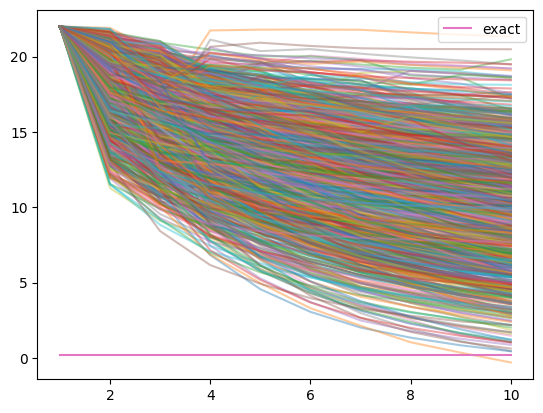

In [9]:
# Get bootstrapped energy curves

identifier = 'ibm_montecarlo_06142024_141824'

bootstrap_samples_H = np.load('data/bootstrap_samples_H_paper.npy', allow_pickle=True)
bootstrap_samples_S = np.load('data/bootstrap_samples_S_paper.npy', allow_pickle=True)

D = len(bootstrap_samples_H[0])
bootstrap_samples = len(bootstrap_samples_H)
bootstrap_samples_gs_en = []
thresholds = []
low_eig_S = []
skipped = 0
for idx in range(bootstrap_samples):

    H_boot = bootstrap_samples_H[idx]
    S_boot = bootstrap_samples_S[idx]
            
    eig_vals, eig_vec = np.linalg.eig(S_boot)
    low_eig_S.append(min(np.real(eig_vals)))

    gs_en_estimates = []
    print(idx)
    
    try:
        threshold, gs_en_estimates, copt = optimize_threshold(D, H_boot, S_boot, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=2, dimn_scaling=1)
        print(threshold)
        if all(gs_en_estimates[i] <= gs_en_estimates[0] for i in range(1,D)):
            bootstrap_samples_gs_en.append(gs_en_estimates)
            thresholds.append(threshold)
        else:
            print('SKIPPING THIS RESAMPLE 1')
            skipped += 1
    except Exception as e:
        print('SKIPPING THIS RESAMPLE 2', e)
        skipped += 1

print('SKIPPED', skipped)

for gs_en_estimates in bootstrap_samples_gs_en:
    plt.plot(range(1,D+1), gs_en_estimates, alpha=0.4)
plt.plot(range(1,D+1), [exact_gse]*D, label = 'exact')

plt.plot(range(1,D+1), ideal_energies[:D])

plt.legend()
plt.show()

In [10]:
len([t for t in thresholds if t<1.1e-8])

1171

In [207]:
# np.save('bootstrap_energies', bootstrap_samples_gs_en)

In [12]:
np.save('data/experiment_expvals', experiment_expvals)
np.save('data/experiment_expvals_err', experiment_expvals_err)

In [13]:
# GET RAW (non-bootstrapped) EXPERIMENTAL RESULTS

experiment_expvals = np.load('data/experiment_expvals.npy', allow_pickle=True).tolist()
experiment_expvals_err = np.load('data/experiment_expvals_err.npy', allow_pickle=True).tolist()

D = 10



def exp_fun(x, a, b):
    return a*np.exp(-b * x) 

def lin_fun(x, a, b):
    return a*x + b

extrapolted_exp_vals_all_terms, extrapolted_exp_vals_err_all_terms = [], []

for exp_idx in range(len(experiment_expvals[1])):
    extrapolted_exp_vals, extrapolted_exp_vals_err = {}, {}
    for pauli in all_meas.paulis.to_labels():
        noise_expvals, noise_expvals_err = [], []

        for noise in noise_scales:
            noise_expvals.append(experiment_expvals[noise][exp_idx][pauli])
            noise_expvals_err.append(float(experiment_expvals_err[noise][exp_idx][pauli])) 

        noise_scales = np.array(noise_scales)
        popt_lin, pcov_lin = curve_fit(f=lin_fun, xdata = noise_scales, ydata=noise_expvals, p0=[1,1], sigma=noise_expvals_err, absolute_sigma=True, maxfev=100000000 )#)
        expval_lin = popt_lin[-1]
        expval_lin_error = np.sqrt(np.diag(pcov_lin))[-1]
        r_lin = np.array(noise_expvals) - lin_fun(np.array(noise_scales), *popt_lin)
        expval_lin_chisqr = np.sum((r_lin/noise_expvals_err)**2)
        popt_exp, pcov_exp = curve_fit(f=exp_fun, xdata=noise_scales, ydata=noise_expvals, p0=[1,0], sigma=noise_expvals_err, absolute_sigma=True, maxfev=100000000 )#sigma=noise_expvals_err, absolute_sigma=True, maxfev=10000000)
        expval_exp = popt_exp[0] #+ popt_exp[-1]
        expval_exp_error = np.sqrt(np.diag(pcov_exp))[0]
        r_exp = np.array(noise_expvals) - exp_fun(np.array(noise_scales), *popt_exp)
        expval_exp_chisqr = np.sum((r_exp/noise_expvals_err)**2)
        
        expval_lin_confined = False
#         if abs(expval_lin - np.sign(expval_lin)*3*expval_lin_error) <= 1:
        if abs(expval_lin) + 0*abs(expval_lin_error) <= 1 + 0*abs(expval_lin_error):
            expval_lin_confined =True

        expval_exp_confined = False 
#         if abs(expval_exp - np.sign(expval_exp)*3*expval_exp_error) <= 1:
        if abs(expval_exp) + 0*abs(expval_exp_error) <= 1 + 0*abs(expval_exp_error):
            expval_exp_confined = True 

        if expval_lin_confined & expval_exp_confined: # if both extrapolated expvals have valid pauli expvals
            if expval_lin_chisqr < expval_exp_chisqr: # check if lin fit has lower chi_sqr
                extrapolted_exp_vals[pauli] = expval_lin
                extrapolted_exp_vals_err[pauli] = expval_lin_error

            else:
                if abs(expval_exp_error/expval_exp) > 1: # check if exp extrapolation error is too high
                    extrapolted_exp_vals[pauli] = expval_lin
                    extrapolted_exp_vals_err[pauli] = expval_lin_error  
                else:
                    extrapolted_exp_vals[pauli] = expval_exp
                    extrapolted_exp_vals_err[pauli] = expval_exp_error

        else:
            if expval_lin_confined:

                extrapolted_exp_vals[pauli] = expval_lin
                extrapolted_exp_vals_err[pauli] = expval_lin_error  
            else:

                extrapolted_exp_vals[pauli] = expval_exp
                extrapolted_exp_vals_err[pauli] = expval_exp_error


        if not(expval_lin_confined) and not(expval_exp_confined):
            print(pauli, 'beyond ideal values:', extrapolted_exp_vals[pauli])

    # print(exp_idx, extrapolted_exp_vals)

    extrapolted_exp_vals_all_terms.append(extrapolted_exp_vals)
    extrapolted_exp_vals_err_all_terms.append(extrapolted_exp_vals_err)


relative_phases = [np.exp(-1j*sum([c for p,c in H.to_list() if 'Z' in p])*i*dt/2) for i in range(10)]


# Assemble H_D, the Krylov Hamiltonian matrix of dimension D:
H_D_first_row_orig = np.zeros(D-1, dtype=complex)

# In the weight-optimized case, all of the terms are measured w.r.t. the same circuit, so we get to add them all at once.
for i, exp_vals in enumerate(extrapolted_exp_vals_all_terms):
    # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
    H_D_first_row_orig[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(H_meas.coeffs, [exp_vals[p.to_label()] for p in H_meas.paulis]))

###################### add d=0 element
H_D_first_row_orig = np.array([22+0j]+H_D_first_row_orig.tolist())
########################            
        
# Assemble S_D, the overlap matrix of dimension D:
S_D_first_row_orig = np.zeros(D-1, dtype=complex)

# Add in ancilla-only measurements:
for i, exp_vals in enumerate(extrapolted_exp_vals_all_terms):
    # Get the coefficients and expectation values corresponding to actual terms in the Hamiltonian (as opposed to the ancilla-only measurements).
    S_D_first_row_orig[i] += relative_phases[i+1]*sum(coeff*val for coeff, val in zip(S_meas.coeffs, [exp_vals[p.to_label()] for p in S_meas.paulis]))

###################### add d=0 element
S_D_first_row_orig = np.array([1+0j]+S_D_first_row_orig.tolist())
########################            

/var/folders/_4/6l94f14x4fngr6ncf9lb59100000gn/T/ipykernel_50354/1722104034.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noise_expvals_err.append(float(experiment_expvals_err[noise][exp_idx][pauli]))


In [17]:
# Output of above cell:
H_D_first_row_orig = np.array([(22+0j), (4.928587702670926-7.554614432285984j), (-3.4785497297099828-1.0165084129155646j), (0.022219876170377906+0.7139331614087792j), (0.784515982487866+0.852250695927868j), (1.4385257860845997-0.24773905644870048j), (-0.18130598456816946-0.16210951838164234j), (0.30449568975660757+0.5533712789500979j), (-0.008043766135061463+0.1512017678427373j), (-0.040058297716093885-0.39290537404234444j)])
S_D_first_row_orig = np.array([(1+0j), (0.04987193591052966-0.5323469543934953j), (-0.1652105296152074-0.09649725403004547j), (-0.7884386800835774+0.552491457721033j), (0.032430692161151735+0.053758731091687884j), (0.02155557745671913-0.00431330241727313j), (0.008651117403579251+0.0058629406226813315j), (0.006007791256022318-0.02975059206346154j), (-0.006744998756120804-0.004452633719688598j), (-0.016863853060223734-0.004390736512326295j)])

H_D_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(D),repeat=2):
    if i >= j:
        H_D_orig[j,i] = H_D_first_row_orig[i-j]
    else:
        H_D_orig[j,i] = np.conj(H_D_first_row_orig[j-i])

                
S_D_orig = np.zeros((D,D), dtype=complex)

# Distribute entries from first row across matrix:
for i,j in it.product(range(D),repeat=2):
    if i >= j:
        S_D_orig[j,i] = S_D_first_row_orig[i-j]
    else:
        S_D_orig[j,i] = np.conj(S_D_first_row_orig[j-i])
        

threshold, gs_en_orig, copt = optimize_threshold(D, H_D_orig, S_D_orig, 0, fit_tol=0.5, init_threshold=1e-8, skip_D=2, dimn_scaling=1)
print(threshold)

init_threshold too high
1.0000000000000002e-08


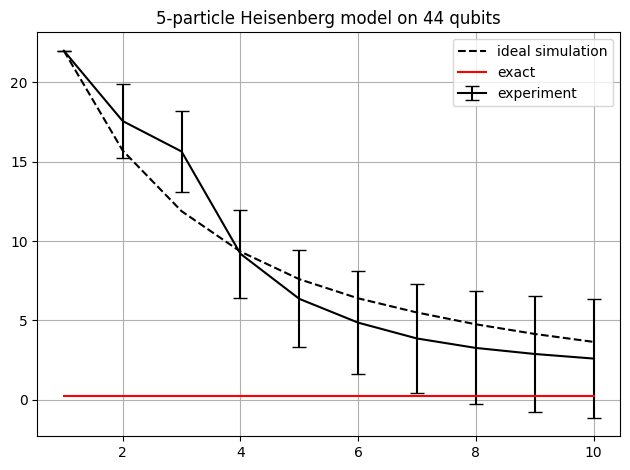

In [18]:
stds = np.apply_along_axis(np.std, 0, bootstrap_samples_gs_en)
plt.errorbar(range(1,D+1), gs_en_orig, stds, label='experiment', color='k', capsize=5)

plt.plot(range(1,D+1), ideal_energies[:D], label='ideal simulation', color='k', linestyle='dashed')
plt.plot(range(1,D+1), [exact_gse]*D, label = 'exact', color='r')

# plt.xlabel('Krylov dimension')
# plt.ylabel('Ground state energy estimate')

plt.grid()
plt.legend(loc='upper right')
plt.title('5-particle Heisenberg model on 44 qubits')

plt.tight_layout()
plt.savefig('5_particle_fig.pdf')

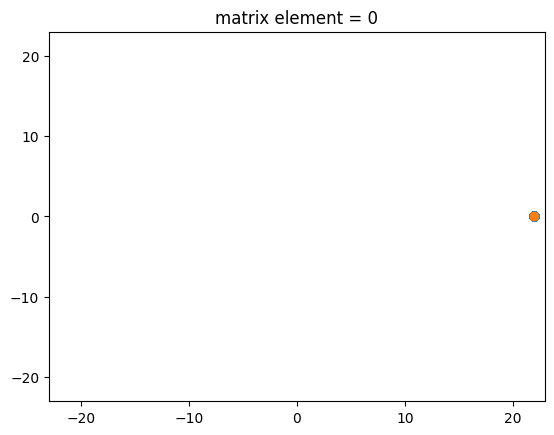

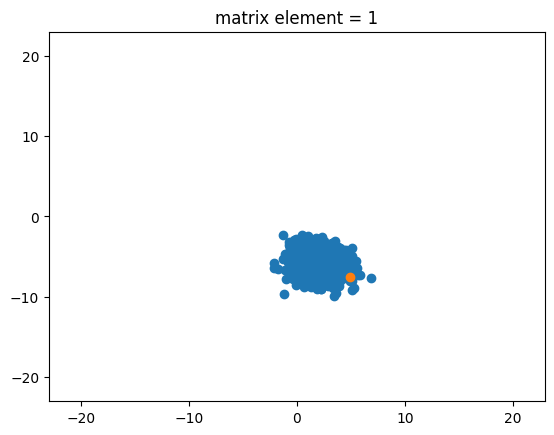

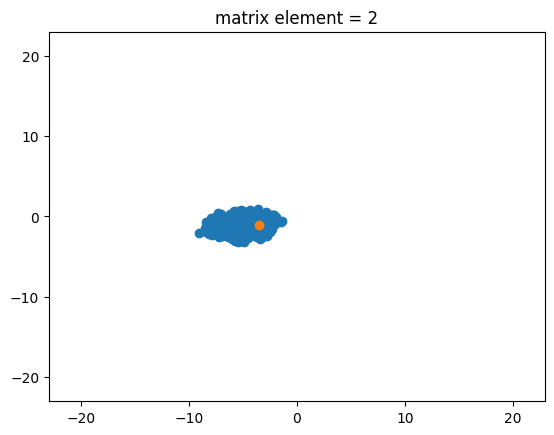

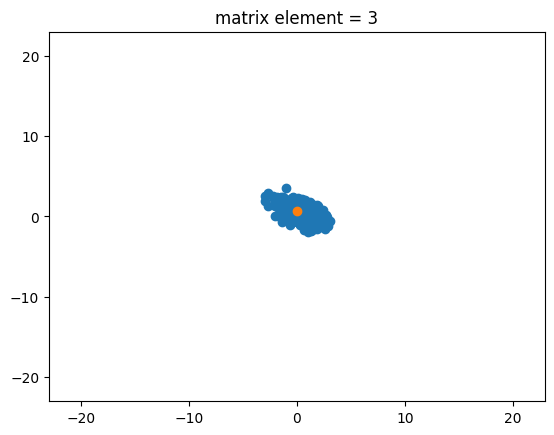

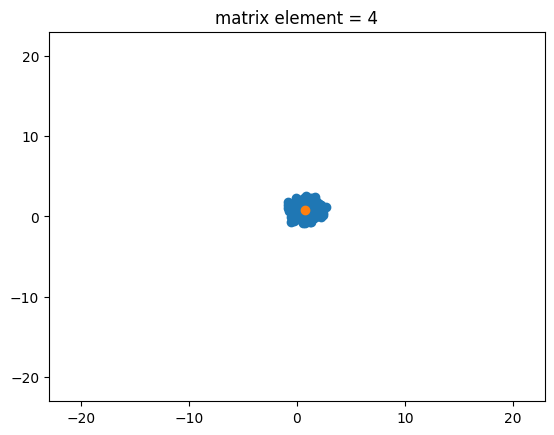

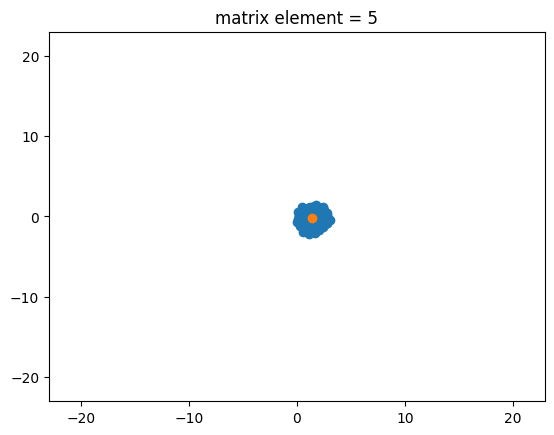

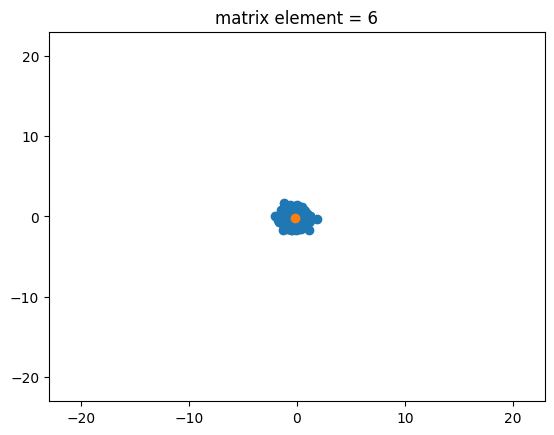

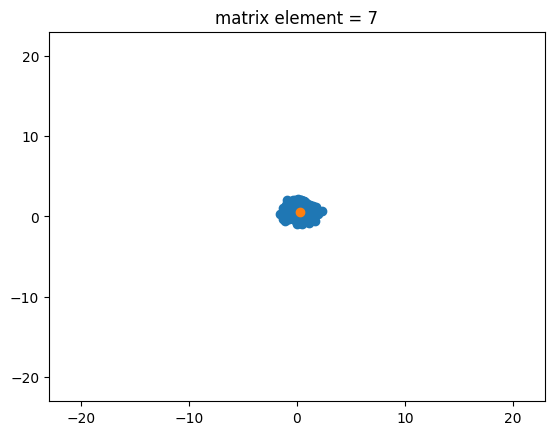

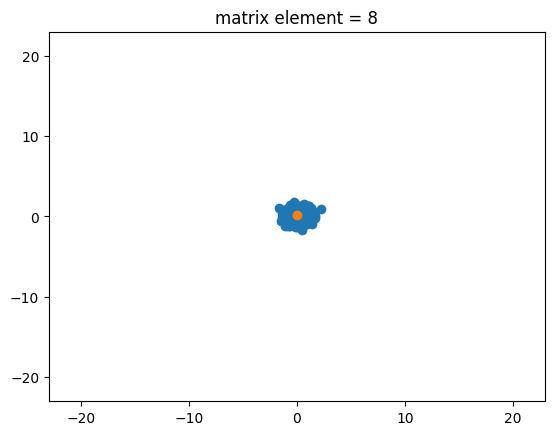

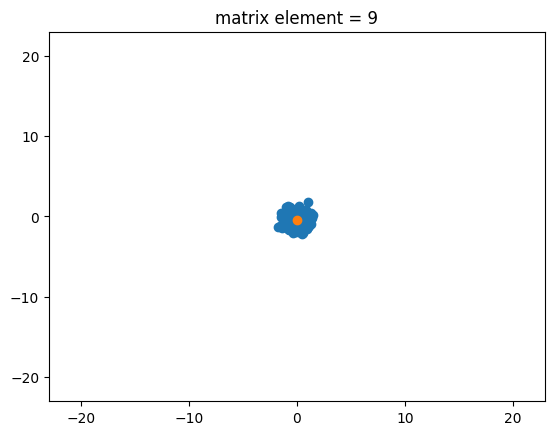

In [19]:
# Compare raw with bootstraps for each matrix element in H

D = 10
bootstrap_samples = 1271

entries_H_first_row = [[] for _ in range(D)]

for idx in range(bootstrap_samples):
    H_boot = bootstrap_samples_H[idx]
    for i in range(D):
        entries_H_first_row[i].append(H_boot[0][i])

for i in range(D):
    plt.scatter([np.real(entries_H_first_row[i][j]) for j in range(bootstrap_samples)], [np.imag(entries_H_first_row[i][j]) for j in range(bootstrap_samples)])
    plt.scatter([np.real(H_D_orig[0][i])], [np.imag(H_D_orig[0][i])])
    plt.title('matrix element = {}'.format(i))
    plt.xlim((-23,23))
    plt.ylim((-23,23))
    plt.show()

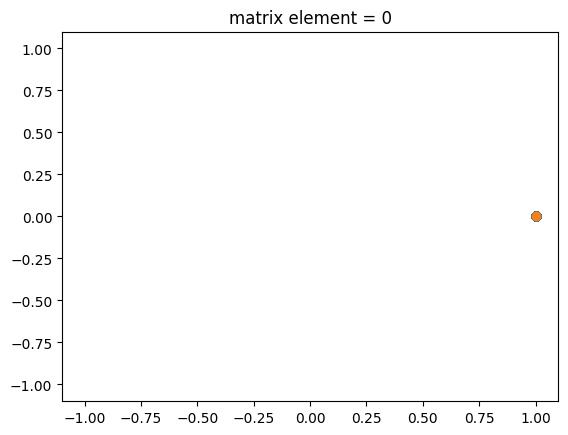

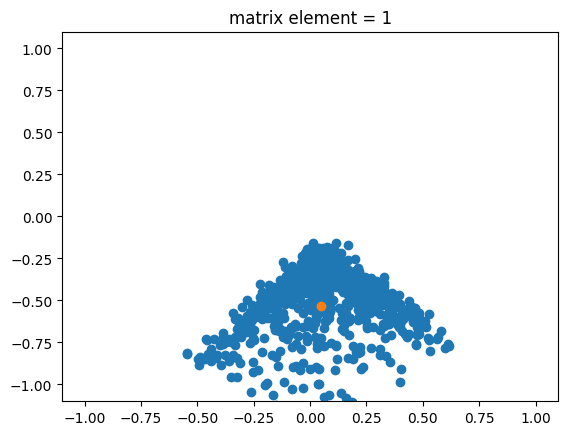

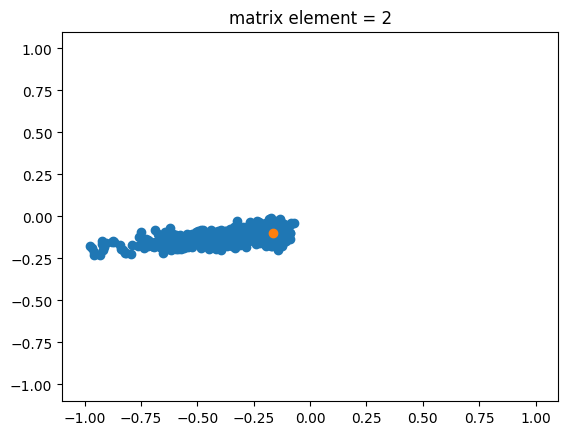

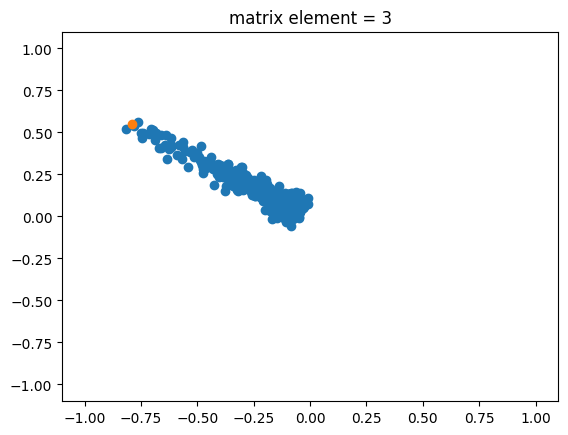

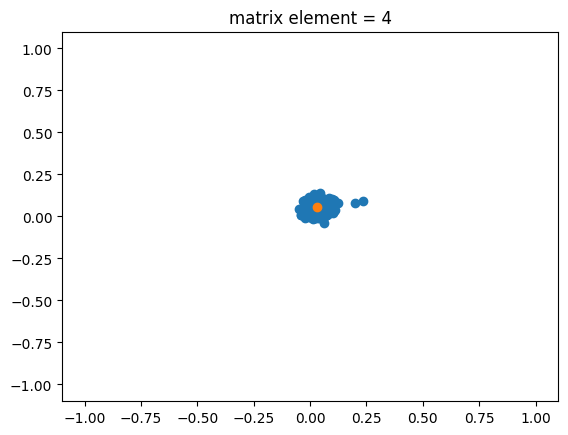

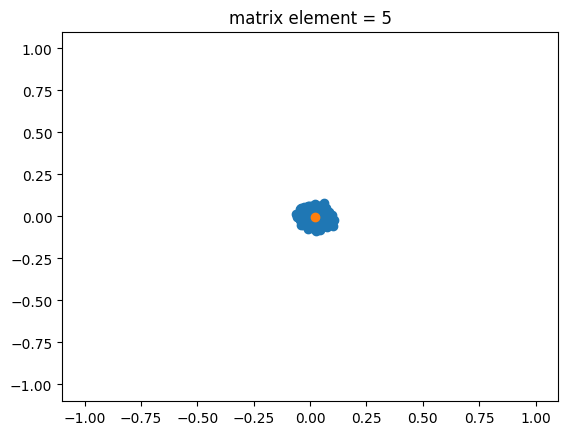

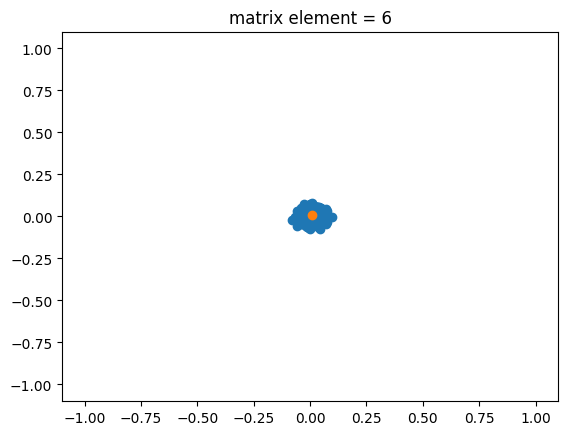

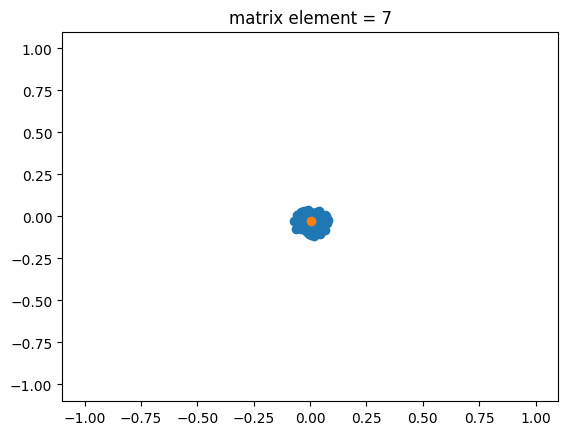

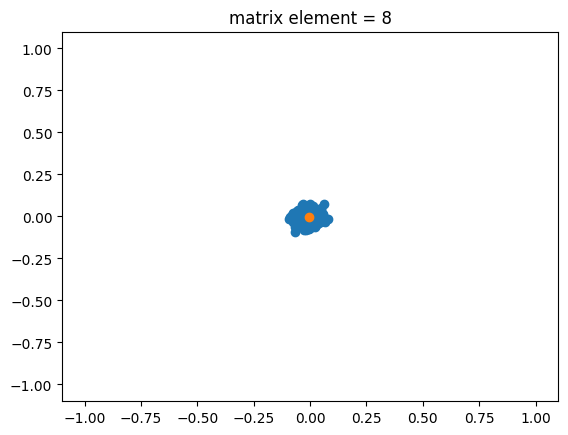

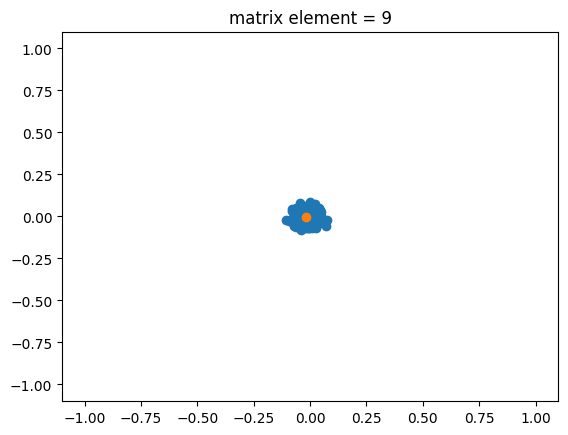

In [20]:
# Compare raw with bootstraps for each matrix element in S

bootstrap_samples = 1271

entries_S_first_row = [[] for _ in range(D)]

for idx in range(bootstrap_samples):#[13]:#
    S_boot = bootstrap_samples_S[idx]
    for i in range(D):
        entries_S_first_row[i].append(S_boot[0][i])

for i in range(D):
    plt.scatter([np.real(entries_S_first_row[i][j]) for j in range(bootstrap_samples)], [np.imag(entries_S_first_row[i][j]) for j in range(bootstrap_samples)])
    plt.scatter([np.real(S_D_orig[0][i])], [np.imag(S_D_orig[0][i])])
    plt.title('matrix element = {}'.format(i))
    plt.xlim((-1.1,1.1))
    plt.ylim((-1.1,1.1))
    plt.show()

In [21]:
# Print lowest eigenvalue of each principal submatrix of S, divided by its dimension
for d in range(1,11):
    print(min([v for v in np.linalg.eigvalsh(S_D_orig[:d,:d]) if v>0])/d)

1.0
0.23266103452569142
0.1083175027999939
0.1426349500744598
0.07467846826066114
0.004239578925911559
0.04384586516849498
0.024508034958422166
0.008913885963146899
0.023430008786944415
